# Tablas de Frecuencias e Histograma con Python

## Introducción
El presente trabajo tiene como motivación facilitar la creación de tablas de frecuencia e histogramas de manera personalizada. Actualmente, el lenguaje de programación Python y su biblioteca Pandas, en conjunto con Matplotlib y Seaborn, permiten el análisis de datos para grandes conjuntos de datos, incluyendo su visualización. Sin embargo, su enfoque se centra principalmente en ámbitos más profesionales, dejando posiblemente de lado el ámbito educativo. ¿A qué me refiero? Al estudiar los temas pertinentes de estadística descriptiva, específicamente el diagrama diferencial conocido como histograma y su base de creación que son las tablas de frecuencia, me di cuenta de que realizar este proceso en las herramientas de oficina puede resultar tedioso, desviando tal vez la atención del estudiante de lo que, desde mi punto de vista personal, es la interpretación de los datos. Esto es así, ya que como mencioné, los paquetes informáticos actuales proporcionan poderosas herramientas que permiten realizar cálculos estadísticos y representaciones gráficas casi de forma automática. Incluso, actualmente, no es necesario tener conocimientos básicos de programación en Python debido a las innovaciones tecnológicas en el área de la inteligencia artificial.

En este trabajo, describo el procedimiento para la creación de un script en Python que solicita al usuario un conjunto de datos unidimensional continuos. Estos datos pueden ser ingresados manualmente o automáticamente al insertar la ruta local del archivo en formato CSV. Finalmente, con los datos proporcionados, el script crea una tabla de frecuencias siguiendo el estándar impartido en el salón de clases y, además, crea un histograma. Permite al usuario seleccionar el tipo de regla empírica que desea utilizar para determinar el número de clases. Todo esto se logra utilizando las bibliotecas de Python: Pandas, Seaborn y Matplotlib.

Para ejecutar este trabajo, simplemente abre un navegador web y busca el siguiente enlace: [Enlace a Google Colab](https://colab.research.google.com/). Luego, abre el presente archivo y ejecuta todas las celdas de este documento presionando Ctrl + F9.

Según Vargas(1995) "La representación del histograma esta fundamentada en la proporcionalidad de las áreas de rectángulos a las frecuencias de cada modalidad". Es decir, que cada rectángulo representado en el histograma tiene una altura correspondiente a la frecuencia de esa clase.

## Desarrollo
Para desarrollar el script descrito se sigue la siguiente metodología:
1. Solicitamos al usuario ingrese los datos manualmente o en su caso la ruta del archivo CSV.
2. Ordenamos los datos de manera ascendente.
3. Se solicita el número de clases segun las reglas empíricas preprogramadas.
4. Creamos las clases según el número de clases obtenido y el ancho de clase encontrado.
5. Creamos la tabla de frecuencias.
6. Creamos el histograma.


### 1. Solicitud de los datos al usuario

In [1]:
import pandas as pd
import seaborn as sns
import math

In [2]:
# Definimos función para la adquisición de los datos
def adq_data():
    """
    Esta función permite al usuario ingresar datos manualmente o cargar un archivo CSV y
    crea una Serie de Pandas a partir de los datos ingresados o cargados.
    """
    opc = input("¿Desea ingresar los datos manualmente (M) o cargar un archivo CSV (C)? ").upper()
    
    if opc == 'M':
        # Datos ingresados manualmente

        # Solicitar al usuario ingresar datos separados por comas
        datos_str = input("Ingrese datos separados por comas: ")
        
        nombre_columna = input("Ingrese el nombre de la columna de datos: ")

        # Convertir la cadena de entrada en una lista
        datos_lista = [dato.strip() for dato in datos_str.split(',')]

        # Crear una Serie de Pandas a partir de la lista
        serie_datos = pd.Series(datos_lista)

        # Mostrar la Serie resultante
        print("Serie de Pandas creada:")
        print(serie_datos)

    elif opc == 'C':
        # Datos cargados desde un archivo CSV
        # Solicitar al usuario ingresar la ruta del archivo CSV
        ruta_archivo = input("Ingrese la ruta del archivo CSV: ")

        try:
            # Intentar cargar el archivo CSV en un DataFrame
            df = pd.read_csv(ruta_archivo)

            # Solicitar al usuario ingresar el nombre de la columna de datos en el archivo CSV
            nombre_columna = input("Ingrese el nombre de la columna de datos en el archivo CSV: ")

            if nombre_columna not in df.columns:
                print(f"La columna '{nombre_columna}' no existe en el archivo CSV.")
            else:
                # Seleccionar la columna especificada
                serie_datos = df[nombre_columna]

                # Verificar si la serie está vacía
                if serie_datos.empty:
                    print("El archivo CSV está vacío o no contiene datos válidos.")
                else:
                    # Mostrar la Serie resultante
                    print("Serie de Pandas creada:")
                    print(serie_datos)
        except FileNotFoundError:
            print(f"No se encontró el archivo '{ruta_archivo}'. Por favor, verifique la ruta.")
        except pd.errors.ParserError:
            print("El archivo CSV no es válido o no contiene datos válidos.")
        except Exception as e:
            print(f"Se produjo un error inesperado: {str(e)}")
    return serie_datos, nombre_columna
# Llamar a la función principal
data_series, nombre_columna = adq_data()

Serie de Pandas creada:
0      171,00
1      174,00
2      177,50
3      170,90
4      174,50
        ...  
595    170,30
596    170,00
597    179,00
598    177,30
599    173,90
Name: Estatura (cm), Length: 600, dtype: object


### 2. Ordenamos los datos y los limpiamos

In [3]:
def limp_data(data_series, nombre_columna):
    """
    Limpia y procesa una Serie de Pandas que contiene datos numéricos.

    Esta función toma una Serie de Pandas y realiza las siguientes operaciones:
    1. Ordena la serie en orden ascendente sin mantener el índice original.
    2. Convierte la serie en un DataFrame con el nombre de columna especificado.
    3. Reemplaza comas por puntos en la columna y convierte los valores a tipo float.

    Args:
        data_series (pd.Series): La Serie de Pandas que contiene los datos a procesar.
        nombre_columna (str): El nombre de la columna en el DataFrame resultante.

    Returns:
        pd.DataFrame: Un DataFrame limpio y procesado con los datos numéricos.

    Example:
        data_series = pd.Series(["3,2", "1,5", "4,8"])
        nombre_columna = "Valores"
        data = limp_data(data_series, nombre_columna)
        data.info()

    """
    data_series = data_series.sort_values(ignore_index=True)
    data = data_series.to_frame(nombre_columna)
    # Reemplazar comas por puntos y convertir a float
    data[nombre_columna] = data[nombre_columna].str.replace(',', '.').astype(float)
    data[nombre_columna] = data[nombre_columna].astype(float)
    
    return data

data = limp_data(data_series, nombre_columna)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Estatura (cm)  600 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


### 3. Se solicita el número de clases segun las reglas empíricas preprogramadas.


In [4]:
def seleccionarReglasEmpiricas(data):
    """
    Esta función permite al usuario seleccionar una regla empírica para calcular el número de clases 
    en función de los datos proporcionados.

    Args:
    data (pandas.DataFrame): El DataFrame que contiene los datos para los cuales se calculará el número de clases.

    Returns:
    int: El número de clases calculado según la regla empírica seleccionada.

    Menú de Reglas Empíricas:
    1. Regla de 2 a la potencia de K
    2. Regla de Sturges
    3. Regla de la raíz cuadrada
    4. Regla de Rice
    5. Salir

    Selecciona la regla empírica a utilizar para calcular el número de clases (1/2/3/4/5):
    """
    
    bandera = True
    N = data.size
    while bandera:
        print("Menú de Reglas Empíricas:")
        print("1. Regla de 2 a la potencia de K")
        print("2. Regla de Sturges")
        print("3. Regla de la raiz cuadrada")
        print("4. Regla de Rice")
        print("5. Salir")
        
        opcion = input('Selecciona la regla empírica a utilizar para calcular el número de clases (1/2/3/4): ')

        if opcion == '1':
            print("Has seleccionado la Regla de 2 a la potencia de K.")
            for i in range(10000):
                if 2**i > N:
                    num_clases = 2**i
            bandera = False
        elif opcion == '2':
            print("Has seleccionado la Regla de Sturges.")
            num_clases = 1 + 3.3*math.log10(N)
            bandera = False
        elif opcion == '3':
            print("Has seleccionado la Regla de la raiz cuadrada")
            num_clases = round(math.sqrt(N))
            bandera = False
        elif opcion == '4':
            print('Has seleccionado la Regla de Rice')
            num_clases = round((2*N)**1/3)
            bandera = False
        elif opcion == '5':
            print("Saliendo del menú de Reglas Empíricas.")
            bandera = False
        else:
            input("Opción no válida. Por favor, selecciona una opción válida (1/2/3/4).")
    return num_clases
# Llamar a la función para iniciar el menú
num_clases = seleccionarReglasEmpiricas(data)
print(num_clases)


Menú de Reglas Empíricas:
1. Regla de 2 a la potencia de K
2. Regla de Sturges
3. Regla de la raiz cuadrada
4. Regla de Rice
5. Salir
Has seleccionado la Regla de la raiz cuadrada
24


In [8]:
data

,Estatura (cm)
0,159.0
1,161.2
2,162.5
3,163.3
4,164.0
...,...
595,180.7
596,181.5
597,181.7
598,182.3


### 4. Creamos las clases según el número de clases obtenido y el ancho de clase encontrado.
### 5. Creamos la tabla de frecuencias

In [22]:
def crear_clases(data, num_clases):
    min_val = data.min()
    max_val = data.max()
    ancho_clase = (max_val - min_val) / num_clases

    # Crear los intervalos en orden ascendente
    intervalos = [min_val + i * ancho_clase for i in range(num_clases)]
    
    # Agregar el valor máximo como último intervalo, con ambos límites cerrados
    intervalos.append(max_val + ancho_clase)

    categorias = pd.cut(data, bins=intervalos, right=False)

    # Contar las frecuencias
    frecuencias = categorias.value_counts().reset_index()
    frecuencias.columns = ['Intervalo', 'Frecuencia']

    # Ordenar los resultados por el valor del intervalo
    frecuencias = frecuencias.sort_values(by='Intervalo')

    # Calcular la frecuencia absoluta acumulada
    frecuencias['Frecuencia Absoluta Acumulada'] = frecuencias['Frecuencia'].cumsum()

    # Calcular la frecuencia relativa
    frecuencias['Frecuencia Relativa'] = frecuencias['Frecuencia'] / len(data)

    # Calcular la frecuencia relativa acumulada
    frecuencias['Frecuencia Relativa Acumulada'] = frecuencias['Frecuencia Relativa'].cumsum()

    print(frecuencias)
    return min_val, max_val, ancho_clase, frecuencias

# Llamar a la función para crear la tabla de frecuencias
minimo, maximo, ancho, frecuencias = crear_clases(data[nombre_columna], num_clases)
print(f"Mínimo: {minimo}, Máximo: {maximo}, Ancho de Clase: {ancho}")


             Intervalo  Frecuencia  Frecuencia Absoluta Acumulada  \
19    [159.0, 159.975)           1                              1   
23   [159.975, 160.95)           0                              1   
22   [160.95, 161.925)           1                              2   
20    [161.925, 162.9)           1                              3   
21    [162.9, 163.875)           1                              4   
15   [163.875, 164.85)           9                             13   
14   [164.85, 165.825)          11                             24   
11    [165.825, 166.8)          24                             48   
10    [166.8, 167.775)          29                             77   
8    [167.775, 168.75)          33                            110   
6    [168.75, 169.725)          35                            145   
4     [169.725, 170.7)          47                            192   
2     [170.7, 171.675)          64                            256   
1    [171.675, 172.65)          71

### 5. Creamos el histograma

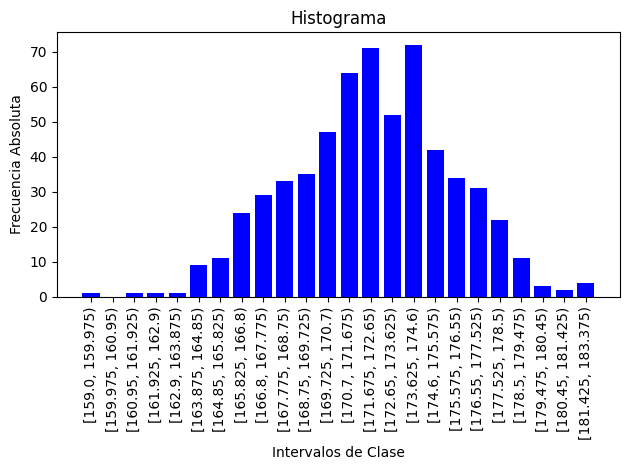

In [28]:
import matplotlib.pyplot as plt

def grafico_histograma(frecuencias):
    # Convertir los intervalos a cadenas de texto
    intervalos_str = [str(intervalo) for intervalo in frecuencias['Intervalo']]

    # Crear el gráfico de barras con la frecuencia absoluta
    plt.bar(intervalos_str, frecuencias['Frecuencia'], color='blue')

    # Agregar etiquetas y título
    plt.xlabel('Intervalos de Clase')
    plt.ylabel('Frecuencia Absoluta')
    plt.title('Histograma')

    # Mostrar el gráfico
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se corten
    plt.show()

# Llamar a la función para crear el gráfico de histograma
grafico_histograma(frecuencias)
